In [1]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
import pandas as pd

In [3]:
!kaggle datasets download -d prajwaldongre/nvidia-corp-share-price-2000-2024

Dataset URL: https://www.kaggle.com/datasets/prajwaldongre/nvidia-corp-share-price-2000-2024
License(s): CC0-1.0
100% 131k/131k [00:00<00:00, 593kB/s]
100% 131k/131k [00:00<00:00, 592kB/s]


In [4]:
!kaggle competitions download -c playground-series-s3e16

100% 2.65M/2.65M [00:00<00:00, 4.95MB/s]
100% 2.65M/2.65M [00:00<00:00, 4.23MB/s]


In [5]:
! unzip  '/content/playground-series-s3e16.zip' -d '/content/crabs'

Archive:  /content/playground-series-s3e16.zip
  inflating: /content/crabs/sample_submission.csv  
  inflating: /content/crabs/test.csv  
  inflating: /content/crabs/train.csv  


In [6]:
crabs = pd.read_csv('/content/crabs/train.csv')
crabs.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [7]:
import torch
from torchsummary import summary
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
ages = crabs['Age']
crabs = crabs.drop('Age', axis = 1)
crabs.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


In [9]:
# Кодировка категориальных признаков
onehot_fields = ["M","F","I"]
for field in onehot_fields:
    dummies = pd.get_dummies(crabs['Sex'], prefix=field, drop_first=False)
    crabs = pd.concat([crabs, dummies], axis=1)
new_fields = ['M_F', 'M_I', 'F_I', 'F_M', 'I_F',  'I_M']
for field in new_fields:
      crabs = crabs.drop(field, axis = 1)
crabs.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,M_M,F_F,I_I
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,False,False,True
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,False,False,True
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,True,False,False
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,False,True,False
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,False,False,True


In [10]:
crabs = crabs * 1
crabs = crabs.replace({'Sex': {'I': 0, 'M':1, 'F':3}})
crabs = crabs.drop('id', axis = 1)
crabs.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,M_M,F_F,I_I
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0,0,1
1,0,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0,0,1
2,1,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,0,0
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,0,1,0
4,0,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0,0,1


In [70]:
new_ages = np.arange(min(ages), max(ages),step = 0.1)
print(len(new_ages))
new_ages

280


array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

In [28]:
type(new_ages[0])

numpy.float64

In [82]:
ages = np.array(ages)
for i in range(len(ages)):
  ages[i] = np.float64(ages[i])
ages

array([ 9,  8,  9, ..., 10,  8,  6])

In [21]:
new_ages = list(new_ages)

In [86]:
train_ages = np.array([])
for i in range(len(ages)):
  b = np.where(np.isclose(new_ages, a,atol = 0.0000000001))[0]
  train_ages = np.append(train_ages, b if len(b)>0 else np.where(new_ages = ages[i]))
train_ages[0]

50.0

In [76]:
train_ages

array([80., 70., 80., ..., 90., 70., 50.])

In [87]:
len(train_ages)

74051

In [88]:
len(crabs)

74051

In [89]:
X_train, X_test, y_train, y_test = train_test_split(crabs, train_ages, test_size=0.1, random_state=42)

In [90]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [48]:
X_train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,M_M,F_F,I_I
5841,0,1.2125,0.9375,0.3000,16.697855,7.243297,3.798833,4.139027,0,0,1
7479,1,1.0625,0.8250,0.2625,10.616888,4.365823,2.849125,3.401940,1,0,0
61543,1,1.1625,0.8750,0.2625,11.949314,4.961163,2.806601,3.968930,1,0,0
37373,3,1.5750,1.2250,0.4000,37.874932,15.989118,7.966209,10.489315,0,1,0
42587,0,1.1000,0.8750,0.2500,14.033003,5.159609,3.118445,3.968930,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37194,0,0.7000,0.5250,0.2000,2.041164,0.935534,0.510291,0.765436,0,0,1
6265,3,1.6500,1.2750,0.5250,39.859397,17.605040,8.093782,11.623295,0,1,0
54886,1,1.6750,1.3500,0.4375,42.013959,20.950281,8.292229,10.347568,1,0,0
860,1,1.5000,1.1750,0.4375,37.747359,12.190285,8.221355,10.616888,1,0,0


In [95]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [96]:
from torch import nn

In [97]:
train_tensor = torch.Tensor(X_train)
age_tensor = torch.Tensor(y_train)
trainTensorDataset = TensorDataset(train_tensor, age_tensor)
trainDataLoader = DataLoader(trainTensorDataset, batch_size = 32)

In [98]:
trainTensorDataset[0]

(tensor([ 0.0000,  1.2125,  0.9375,  0.3000, 16.6979,  7.2433,  3.7988,  4.1390,
          0.0000,  0.0000,  1.0000]),
 tensor(50.))

In [99]:
class CrabReg(nn.Module):
  def __init__(self):
        super(CrabReg, self).__init__()
        self.fc1 = nn.Linear(11, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32,1)
        self.Lrelu = nn.LeakyReLU()
        self.sig = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.Lrelu(x)
    x = self.fc2(x)
    x = self.sig(x)
    x = self.fc3(x)
    return x

In [100]:
CrabModel = CrabReg().to(device)
optimizer = torch.optim.Adam(CrabModel.parameters())
LossFunction = torch.nn.SmoothL1Loss(reduction = 'mean')

In [101]:
summary(CrabModel, input_size = (1,11), device = device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 16]             192
         LeakyReLU-2                [-1, 1, 16]               0
            Linear-3                [-1, 1, 32]             544
           Sigmoid-4                [-1, 1, 32]               0
            Linear-5                 [-1, 1, 1]              33
Total params: 769
Trainable params: 769
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
!pip install tqdm

In [102]:
from tqdm import tqdm

In [103]:
train_losses = []
def train(model, epoch,optimz,lossfnc):
  running_loss = 0
  model.train()
  for data in tqdm(trainDataLoader):
    inputs, targets = data[0].to(device), data[1].to(device)
    optimz.zero_grad()
    outs = model(inputs)
    loss = lossfnc(outs, targets)
    loss.backward()
    optimz.step()

    running_loss += loss.item()
  train_loss = running_loss/len(trainDataLoader)
  train_losses.append(train_loss)
  print('Ошибка обучения в эпохе: %.4f'%(train_loss))


In [104]:
epochs = 20
for i in range(epochs):
  train(CrabModel, i,optimizer,LossFunction)

  0%|          | 0/2083 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:939: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
 99%|█████████▉| 2057/2083 [00:04<00:00, 467.89it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:939: UserWarning: Using a target size (torch.Size([21])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
100%|██████████| 2083/2083 [00:04<00:00, 481.97it/s]


Ошибка обучения в эпохе: 20.6828


100%|██████████| 2083/2083 [00:04<00:00, 504.85it/s]


Ошибка обучения в эпохе: 0.0001


100%|██████████| 2083/2083 [00:03<00:00, 560.85it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:04<00:00, 476.68it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:04<00:00, 496.12it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:03<00:00, 567.25it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:03<00:00, 561.54it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:04<00:00, 422.41it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:03<00:00, 563.10it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:04<00:00, 497.79it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:04<00:00, 491.20it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:03<00:00, 559.64it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:03<00:00, 563.91it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:04<00:00, 487.81it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:03<00:00, 561.92it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:03<00:00, 521.61it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:04<00:00, 422.88it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:03<00:00, 554.92it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:03<00:00, 560.56it/s]


Ошибка обучения в эпохе: 0.0000


100%|██████████| 2083/2083 [00:04<00:00, 482.93it/s]

Ошибка обучения в эпохе: 0.0000


In [105]:
test_tensor = torch.Tensor(X_test)
test_age_tensor = torch.Tensor(y_test)
testTensorDataset = TensorDataset(test_tensor, test_age_tensor)
testDataLoader = DataLoader(testTensorDataset, batch_size = 32)

In [106]:
val_losses=[]
def val(model,epoch,optimz,lossfnc):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss=0
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(testDataLoader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=lossfnc(outputs,targets)
            running_loss += loss.item()
        val_loss=running_loss/len(testDataLoader)
        val_losses.append(val_loss)
        print('Ошибка валидации в эпохе: %.4f:'%(val_loss))

In [107]:
epochs = 20
for i in range(epochs):
  val(CrabModel, i,optimizer,LossFunction)


Epoch : 0


 64%|██████▍   | 149/232 [00:00<00:00, 1488.66it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:939: UserWarning: Using a target size (torch.Size([14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
100%|██████████| 232/232 [00:00<00:00, 1442.69it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 1


100%|██████████| 232/232 [00:00<00:00, 1565.89it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 2


100%|██████████| 232/232 [00:00<00:00, 1584.04it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 3


100%|██████████| 232/232 [00:00<00:00, 1479.53it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 4


100%|██████████| 232/232 [00:00<00:00, 1617.32it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 5


100%|██████████| 232/232 [00:00<00:00, 1505.85it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 6


100%|██████████| 232/232 [00:00<00:00, 1419.41it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 7


100%|██████████| 232/232 [00:00<00:00, 1394.67it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 8


100%|██████████| 232/232 [00:00<00:00, 1610.64it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 9


100%|██████████| 232/232 [00:00<00:00, 1627.29it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 10


100%|██████████| 232/232 [00:00<00:00, 1609.01it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 11


100%|██████████| 232/232 [00:00<00:00, 1451.56it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 12


100%|██████████| 232/232 [00:00<00:00, 1610.30it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 13


100%|██████████| 232/232 [00:00<00:00, 1361.09it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 14


100%|██████████| 232/232 [00:00<00:00, 1618.43it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 15


100%|██████████| 232/232 [00:00<00:00, 1589.79it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 16


100%|██████████| 232/232 [00:00<00:00, 1616.66it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 17


100%|██████████| 232/232 [00:00<00:00, 1550.13it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 18


100%|██████████| 232/232 [00:00<00:00, 1499.90it/s]


Ошибка валидации в эпохе: 0.0000:

Epoch : 19


100%|██████████| 232/232 [00:00<00:00, 1335.05it/s]

Ошибка валидации в эпохе: 0.0000:


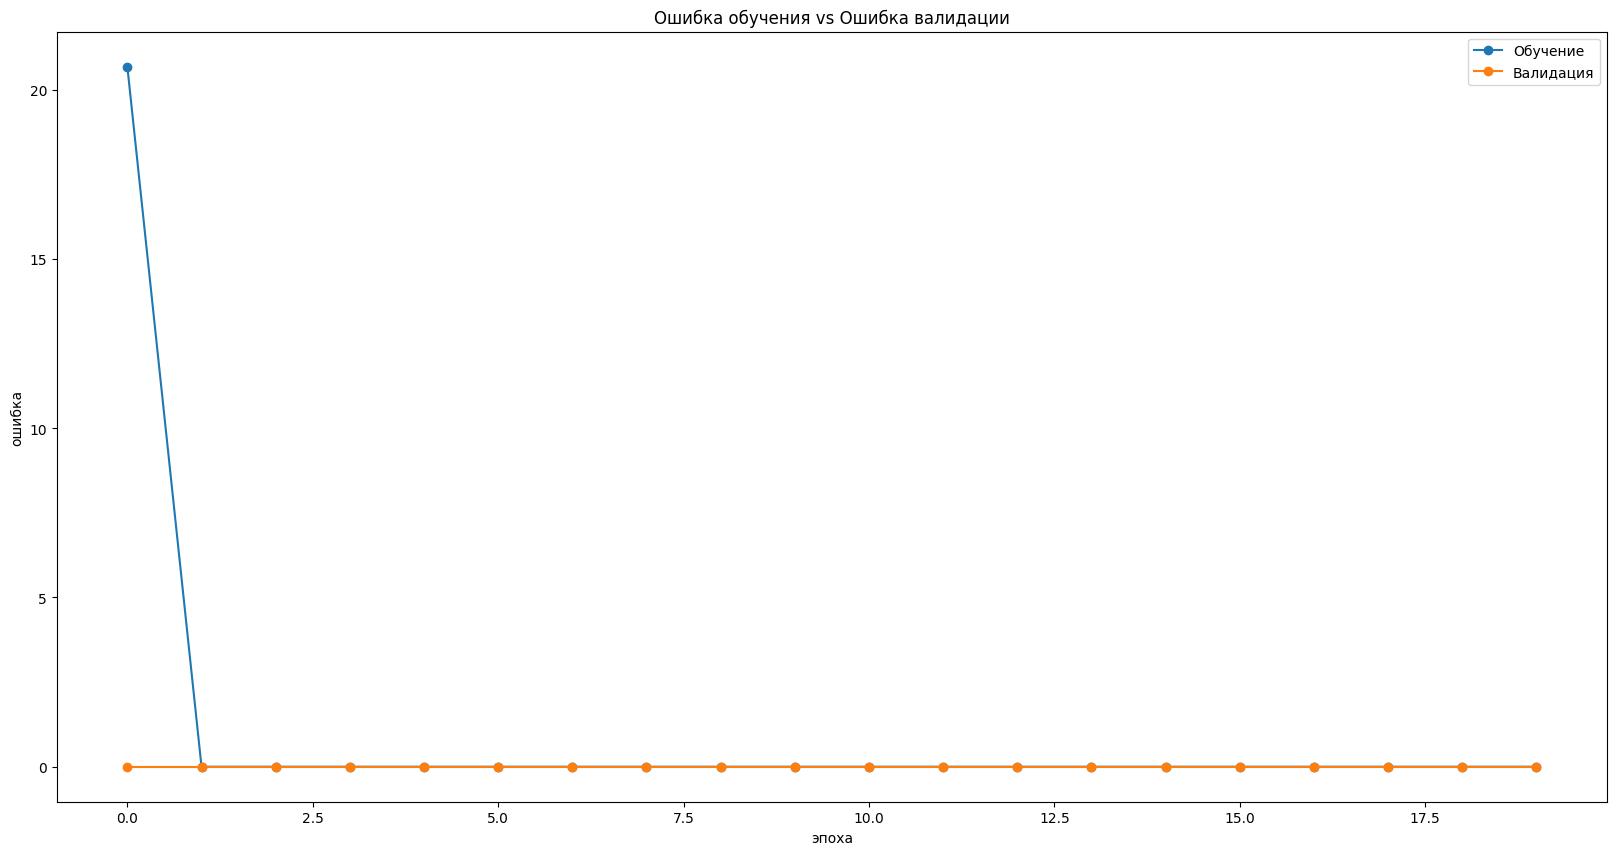

In [108]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()